# Normalization

It's a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

The main idea of normalization is to eliminate all the units and to just keep the magnitude as it makes a ML algo understand much faster about dataset than..

# Type of Normalization 

***MinMaxscaling***:- 90% used in ML


***Mean Normalization***


***Max absulute scaling***


***Robust scaling***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wine_data.csv' , header=None , usecols=[0,1,2])
data.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [3]:
data.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

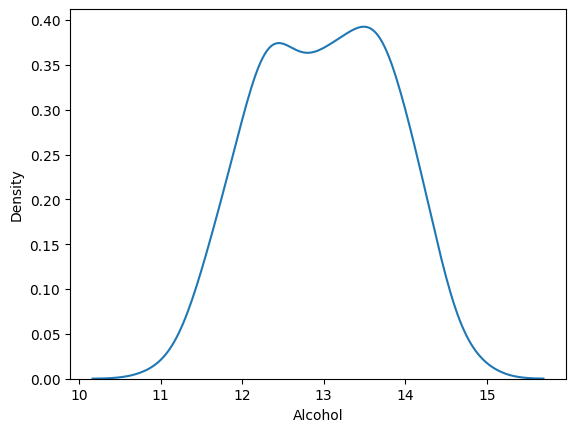

In [4]:
sns.kdeplot(data['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

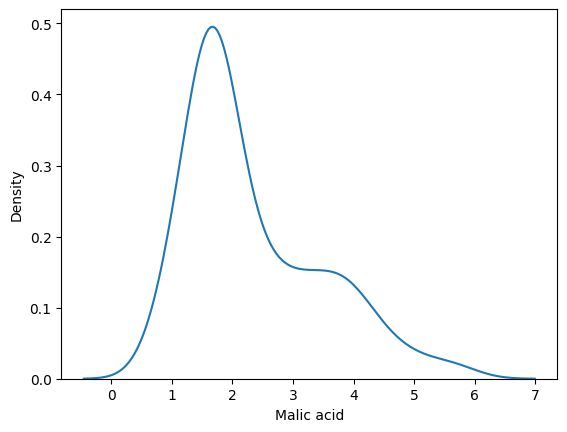

In [5]:
sns.kdeplot(data['Malic acid'])

In [13]:
color_dict={1:'red',3:'green',2:'blue'}


In [14]:
sns.scatterplot(data['Alcohol'],data['Malic acid'],hue=data['Class label'],palette=color_dict)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Class label',axis=1) , data['Class label'] , test_size=0.3 , random_state=0)

In [18]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [21]:
np.round(X_train.describe(), 1 )

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [22]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


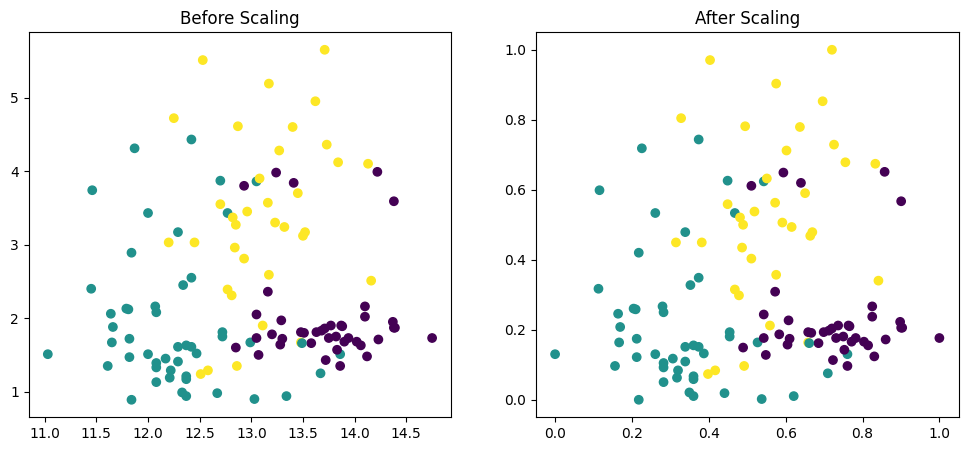

In [26]:
fig,(ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

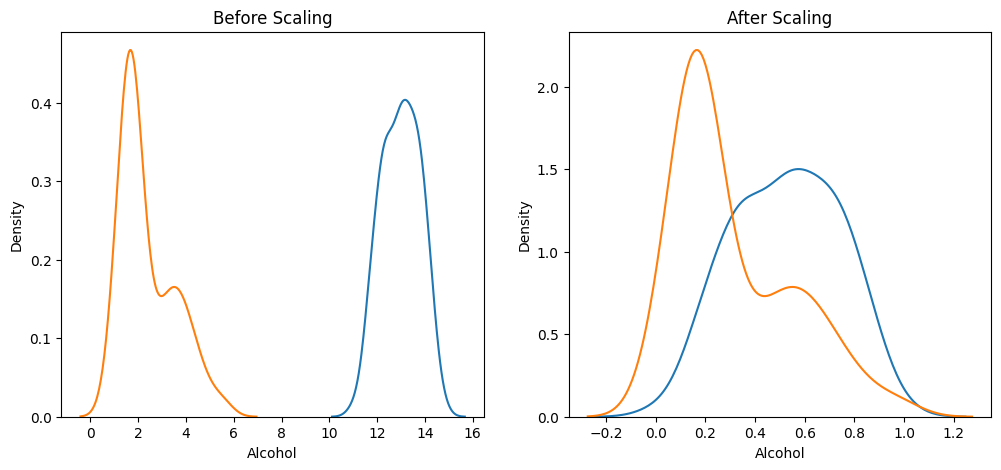

In [28]:
fig,(ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

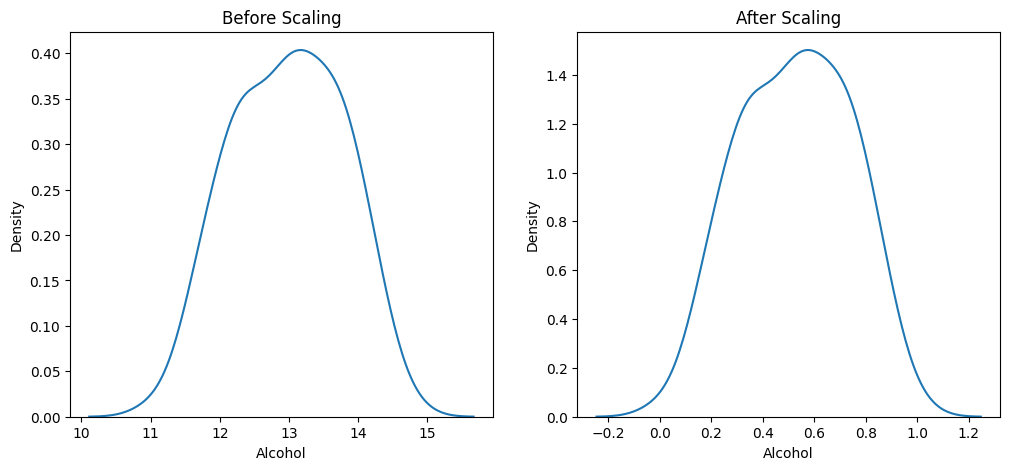

In [29]:
 fig,(ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

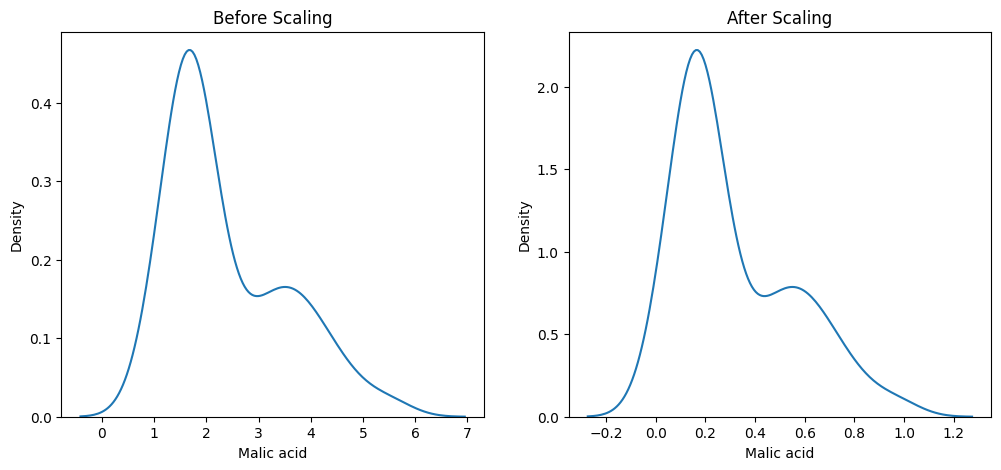

In [31]:
fig,(ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()